# Transformer library

## Models and Tokenizers

In the last session we used `pipeline`to interact with our model.`transformers` also provide a level of abstraction with the details of the underlying process, that can be customized. For that, we are going to use `Models` and `Tokenizer`objects.

`Models`are **neural network** implementation of the Transformer architecture. A **tokenizer** is responsible to convert raw input (text) into a numerical representation the the `Model` can process. `Tokenizer`are not part of the transformer architecture

Let's play a bit with those concepts. First, we need to import the classes for model and tokenizer:

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

In this example we are going to use another model, called `Qwen/Qwen2.5-0.5B-Instruct`. Please, read the card model at [Qwen/Qwen2.5-0.5B-Instruct](https://huggingface.co/Qwen/Qwen2.5-0.5B-Instruct)

In [3]:
model_id = "Qwen/Qwen2.5-0.5B-Instruct"

With that, we can create the model and the tokenizer, following the model card:

In [4]:
model = AutoModelForCausalLM.from_pretrained( 
    model_id,  
    device_map="auto",  
    torch_dtype="auto",  
    trust_remote_code=True,  
) 

`torch_dtype` is deprecated! Use `dtype` instead!


In [5]:
tokenizer = AutoTokenizer.from_pretrained(
    model_id
) 


Let's test the model with this example:

In [6]:
messages = [
    {"role": "system", "content": "You are a helpful travel assistant."},
    {"role": "user", "content": "I am going to Paris, what should I see?"}
]

The `messages`can be `tokenized` using the `apply_chat_template`, which not only tokenize the text, but also takes into account the chat template used by our model.

In [15]:
model_input = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt",
    return_dict=True,
).to(model.device)

print(model_input)

{'input_ids': tensor([[151644,   8948,    198,   2610,    525,    264,  10950,   5821,  17847,
             13, 151645,    198, 151644,    872,    198,     40,   1079,   2087,
            311,  12095,     11,   1128,   1265,    358,   1490,     30, 151645,
            198, 151644,  77091,    198]], device='mps:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]], device='mps:0')}


With the input, we can generate the output of the model:

In [16]:
outputs = model.generate(
    **model_input,
    max_new_tokens=500,
    do_sample=True,
    temperature=0.6,
)
print(outputs)

tensor([[151644,   8948,    198,   2610,    525,    264,  10950,   5821,  17847,
             13, 151645,    198, 151644,    872,    198,     40,   1079,   2087,
            311,  12095,     11,   1128,   1265,    358,   1490,     30, 151645,
            198, 151644,  77091,    198,  59604,    374,    264,   3283,    448,
           1657,  38491,    323,  41166,    429,    498,    646,   3947,      0,
           5692,    525,   1045,    315,    279,   1429,   5411,   6174,   1447,
             16,     13,    468,   3092,    301,  21938,     25,   3776,    315,
            279,   1429,  26277,  59924,    304,    279,   1879,     11,    419,
          21271,  13352,    438,    264,   7735,    315,  12095,    382,     17,
             13,   9729,  48506,  16328,     25,   5379,    311,    825,    315,
            279,   7772,   1947,  15302,    304,    279,   1879,     11,    432,
            594,   2114,    311,   9037,    315,   4278,    315,   1947,    504,
            678,    916,    

And finally, we can use `tokenizer` to obtain the clear text:

In [17]:
print(tokenizer.decode(outputs[0], skip_special_tokens=False))

<|im_start|>system
You are a helpful travel assistant.<|im_end|>
<|im_start|>user
I am going to Paris, what should I see?<|im_end|>
<|im_start|>assistant
Paris is a city with many attractions and sights that you can visit! Here are some of the most popular ones:

1. Eiffel Tower: One of the most iconic landmarks in the world, this tower stands as a symbol of Paris.

2. Louvre Museum: Home to one of the largest art collections in the world, it's home to thousands of works of art from all over the world.

3. Notre-Dame Cathedral: This Gothic cathedral is a must-see for any visitor to Paris. It was built in 1163 and has been the center of French culture since its construction.

4. Montmartre: A charming neighborhood known for its picturesque streets and cafes, including the famous Sacré-Cœur Basilica.

5. Notre-Dame-des-Champs: Another beautiful neighborhood, featuring its own unique architecture and historic charm.

6. Seine River: Take a stroll along the river and enjoy the views of the

## Chat Template and Tokens

Chat templating (please, check https://huggingface.co/docs/transformers/chat_templating) is the way of formatting the input text as is expected by the model. `tokenizer` module help us to handle the formatting. For example, we can just apply the template to transforms our dict `messages`into a formatted text:

In [21]:
tokenizer.apply_chat_template(messages, tokenize=False)

'<|im_start|>system\nYou are a helpful travel assistant.<|im_end|>\n<|im_start|>user\nI am going to Paris, what should I see?<|im_end|>\n'

Also, we can add the prompt for the assistant:

In [25]:
tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

'<|im_start|>system\nYou are a helpful travel assistant.<|im_end|>\n<|im_start|>user\nI am going to Paris, what should I see?<|im_end|>\n<|im_start|>assistant\n'

`tokenizer`generates the tokens of the text, and transform them into `tokens_id` list:

In [31]:
token_ids = (tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True))
print(token_ids)

[151644, 8948, 198, 2610, 525, 264, 10950, 5821, 17847, 13, 151645, 198, 151644, 872, 198, 40, 1079, 2087, 311, 12095, 11, 1128, 1265, 358, 1490, 30, 151645, 198, 151644, 77091, 198]


Tokens are not words! in our case:

In [33]:
tokens = tokenizer.convert_ids_to_tokens(token_ids)

for tid, tok in zip(token_ids, tokens):
    clean = tok.replace("Ġ", "␣").replace("Ċ", "\\n")
    print(f"{tid:6d} | {clean}")

151644 | <|im_start|>
  8948 | system
   198 | \n
  2610 | You
   525 | ␣are
   264 | ␣a
 10950 | ␣helpful
  5821 | ␣travel
 17847 | ␣assistant
    13 | .
151645 | <|im_end|>
   198 | \n
151644 | <|im_start|>
   872 | user
   198 | \n
    40 | I
  1079 | ␣am
  2087 | ␣going
   311 | ␣to
 12095 | ␣Paris
    11 | ,
  1128 | ␣what
  1265 | ␣should
   358 | ␣I
  1490 | ␣see
    30 | ?
151645 | <|im_end|>
   198 | \n
151644 | <|im_start|>
 77091 | assistant
   198 | \n


With `return_dict` we obtain the tokens as dict., with the `input_ids` and an `attention_mask`:

In [36]:
token_ids = (tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_dict=True))
print(token_ids)

{'input_ids': [151644, 8948, 198, 2610, 525, 264, 10950, 5821, 17847, 13, 151645, 198, 151644, 872, 198, 40, 1079, 2087, 311, 12095, 11, 1128, 1265, 358, 1490, 30, 151645, 198, 151644, 77091, 198], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


The `attention_mask`is used here to mark if there are paddings characters, as for example in:

In [37]:
tokens = tokenizer(
    ["short text", "this is a much longer text"],
    padding=True,
    return_tensors="pt"
)

tokens["attention_mask"]

tensor([[1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1]])

Finally, with `return_tensor` we can obtain PyTorch tensors (other valid values are "np", "tf", None):

In [38]:
token_ids = (tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_dict=True, return_tensors="pt"))
print(token_ids)

{'input_ids': tensor([[151644,   8948,    198,   2610,    525,    264,  10950,   5821,  17847,
             13, 151645,    198, 151644,    872,    198,     40,   1079,   2087,
            311,  12095,     11,   1128,   1265,    358,   1490,     30, 151645,
            198, 151644,  77091,    198]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}


## Model parameters

`transformers`allows to control not only what model you load, but also some advanced parameters. First, for loading the model we have:
```python
model = AutoModelForCausalLM.from_pretrained( 
    model_id,  
    device_map="auto",  
    torch_dtype="auto",  
    trust_remote_code=True,  
) 
```

### Model

The first parameter is the `model_id`, which identifies the model to be uploaded. The `model_id` points to HuggingFace web page, where you can find the Model Card and other information. When calling `from_pretrained`, the library downloads (or use cache) the model and loads it in the library.

> Recap: The model name contains the organization that provides it, and the family,version and other parameters:
```
microsoft / Phi - 3 - mini - 128k - instruct
    |       |     |    |      |      |
   Org   Family  Ver. Size Context  Task
```

It is also possible to load models from local filesystem, by defining `model_id` as a path to our model. This will be useful when we work with Kaggle, and also when we fine-tune a model.


Once the model is downloaded, `transformer` loads the `config.json`of the model to know the model parameters. For example, for our current model, the content is:

> Note: You can check the model files in the HuggingFace page, in the `Files and Version`tab.

```json
{
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151645,
  "hidden_act": "silu",
  "hidden_size": 896,
  "initializer_range": 0.02,
  "intermediate_size": 4864,
  "max_position_embeddings": 32768,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads": 14,
  "num_hidden_layers": 24,
  "num_key_value_heads": 2,
  "rms_norm_eps": 1e-06,
  "rope_theta": 1000000.0,
  "sliding_window": 32768,
  "tie_word_embeddings": true,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.43.1",
  "use_cache": true,
  "use_sliding_window": false,
  "vocab_size": 151936
}
```

Some of the *core* parameters are:
 * `architectures`: tells `Transformers` which Python class to instantiate. It is not related to the model architecture, which is Transformers. Maps with a specific implementation.
 * `model_type`: used internally to validate compatibility.
 * `hidden_size`: width of the model. impacts on compute, memory.
 * `num_hidden_layers`: depth of the network (number of transformers blocks)
 * `num_attention_heads`: number of parallel attention heads.
 * `use_cache`: enables KV-cache
 * `torch_dtype`: preferred dtype for loading weights.




There is no a standard schema definding the `config.json`, for backward compatibilities issues. You can check each model by inspecting the code. Example:
```python
from transformers import Qwen2Config
help(Qwen2Config)
```

### Inference

During inference, `Transformers` allows to control how tokens are selected. In our example:

```python
outputs = model.generate(
    **model_input,
    max_new_tokens=500,
    do_sample=True,
    temperature=0.6,
)
```

`model_input`contains the `inputs_ids`, with the input already tokenized in token ids, and the `attention_mask`, used when the input has padding.

`max_new_tokens` limits how many tokens the model can generate after the prompt. 

`do_sample` enables the probabilistic sampling. With `do_sample=False`, the generation is deterministic.

`temperature`controls how strongly the model follows its own preferences. It only matters with `do_sample=True`

Please check https://huggingface.co/docs/transformers/main_classes/text_generation for the full options.


# Transformers architecture

In this section we review the Transformers architecture from a practical point of view. 

The follow picture is from the original [Attention Is All You Need](https://arxiv.org/abs/1706.03762) paper, showing the Transformer architecture. One of the improvements introduced by the architecture is that all the flow is built using the same blocks:

![Transformer Architecture (from All You Need Is Attention)](./img/lab2/transformer_arch.png "Transformer architecture")

Following we are going to analyze the stages and blocks that builds the Transformer architecture

## Input pre-processing

The input pre-processing converts the raw text into tokens, resulting in a list of tokens IDs. This is discussed [above](#chat-template-and-tokens)

```ascii
+--------+       +-------------+       +-------------+
|        |       |             |       |             |
|  Text  |  -->  |  Tokenizer  |  -->  |  Token IDs  | 
|        |       |             |       |             |
+--------+       +-------------+       +-------------+
```

In [1]:
#Example
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "Qwen/Qwen2.5-0.5B-Instruct"
model = AutoModelForCausalLM.from_pretrained( 
    model_id,  
    device_map="auto",  
    torch_dtype="auto",  
    trust_remote_code=True,  
) 
tokenizer = AutoTokenizer.from_pretrained(model_id)



`torch_dtype` is deprecated! Use `dtype` instead!


In [2]:
messages = [
    {"role": "system", "content": "You are a helpful math assistant."},
    {"role": "user", "content": "Do the following operation: $2+2%"}
]
input_ids = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_dict=True, return_tensors="pt")
print(input_ids)
input_ids.to(model.device)

{'input_ids': tensor([[151644,   8948,    198,   2610,    525,    264,  10950,   6888,  17847,
             13, 151645,    198, 151644,    872,    198,   5404,    279,   2701,
           5666,     25,    400,     17,     10,     17,      4, 151645,    198,
         151644,  77091,    198]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])}


{'input_ids': tensor([[151644,   8948,    198,   2610,    525,    264,  10950,   6888,  17847,
             13, 151645,    198, 151644,    872,    198,   5404,    279,   2701,
           5666,     25,    400,     17,     10,     17,      4, 151645,    198,
         151644,  77091,    198]], device='mps:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]], device='mps:0')}

## Input embedding and positional encoding

The `Input embedding` happens only once in before entering the first encoder. This layer transform the input, token ids, into a vector with the expected model dimension.

In [3]:
embedding_layer = model.get_input_embeddings()
with torch.no_grad():
    embeddings = embedding_layer(input_ids["input_ids"])

In [4]:
print("Input IDs shape:", input_ids["input_ids"].shape)
print("Embeddings shape:", embeddings.shape)

Input IDs shape: torch.Size([1, 30])
Embeddings shape: torch.Size([1, 30, 896])


In [5]:
print(embeddings)

tensor([[[ 0.0014, -0.0084,  0.0073,  ..., -0.0032, -0.0128,  0.0187],
         [ 0.0293,  0.0210,  0.0073,  ..., -0.0014, -0.0273, -0.0216],
         [-0.0077,  0.0312, -0.0193,  ...,  0.0177,  0.0029, -0.0125],
         ...,
         [ 0.0014, -0.0084,  0.0073,  ..., -0.0032, -0.0128,  0.0187],
         [ 0.0037,  0.0215,  0.0232,  ..., -0.0165,  0.0001, -0.0109],
         [-0.0077,  0.0312, -0.0193,  ...,  0.0177,  0.0029, -0.0125]]],
       device='mps:0', dtype=torch.bfloat16)


In this Qwen model, the positional encoding is done internally in the Transformer block, together with the attention.

## Attention

In [8]:
model.set_attn_implementation("eager")
with torch.no_grad():
    outputs = model(
        **input_ids,
        output_attentions=True
    )

In [22]:
layer = 8

In [23]:
attn = outputs.attentions[layer][0].mean(dim=0)
attn_np = attn.detach().cpu().to(torch.float32).numpy()

In [24]:
input_ids_tensor = input_ids["input_ids"][0]
tokens = tokenizer.convert_ids_to_tokens(input_ids_tensor.tolist())

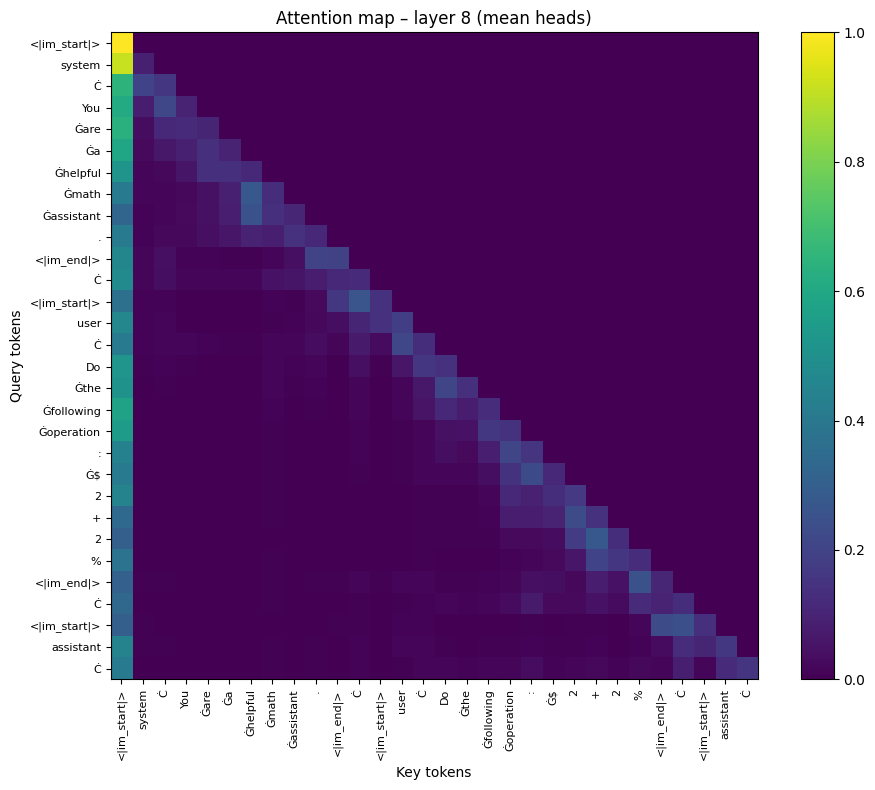

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
plt.imshow(attn_np, cmap="viridis")
plt.xticks(np.arange(len(tokens)), tokens, rotation=90, fontsize=8)
plt.yticks(np.arange(len(tokens)), tokens, fontsize=8)
plt.xlabel("Key tokens")
plt.ylabel("Query tokens")
plt.title(f"Attention map – layer {layer} (mean heads)")
plt.colorbar()
plt.tight_layout()
plt.show()

logits!

# Assignment #2

* Same assignment #1 but playing with parameters
* Load model from filesystem